In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from logits import LogisticRegression, plot_boundary
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# One vs All

![image](onevsall.jpeg)

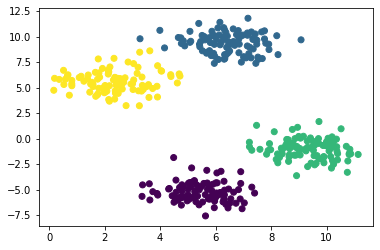

In [2]:
X, y = make_blobs(n_samples=400, n_features=2, centers=4,random_state=13)
y_ = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In [3]:
pd.DataFrame(y_).value_counts()

0    100
1    100
2    100
3    100
dtype: int64

Now to train these three classifiers, we need to create three training datasets. And we will use logistic Regression implemented in (TP-2) to classify each datasets.

In [4]:
y1 = np.zeros(y_.shape)
for i in range(len(y)):
    if y[i] == 0:
        y1[i] = 1
    else :
        y1[i] = 0

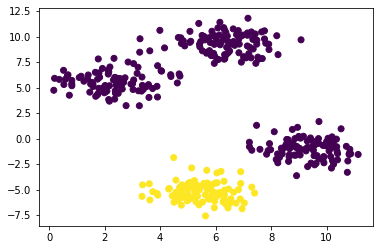

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y1)
plt.show()

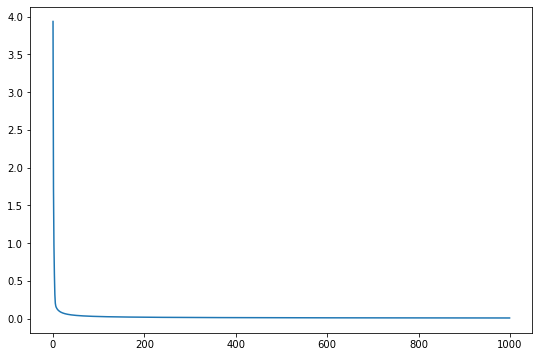

In [6]:
L1 = LogisticRegression(X)
L1.fit(X,y1)

(90000, 2)


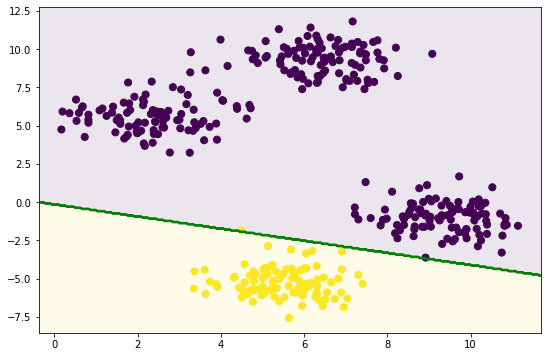

In [7]:
plot_boundary(X,y1,L1)

In [8]:
y2 = np.zeros(y_.shape)
for i in range(len(y_)):
    if y[i] == 1:
        y2[i] = 1
    else :
        y2[i] = 0

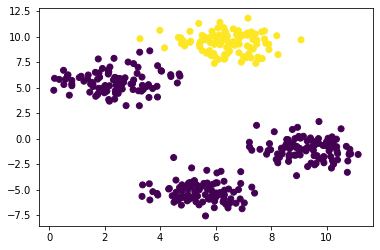

In [9]:
plt.scatter(X[:,0], X[:, 1], c=y2)
plt.show()

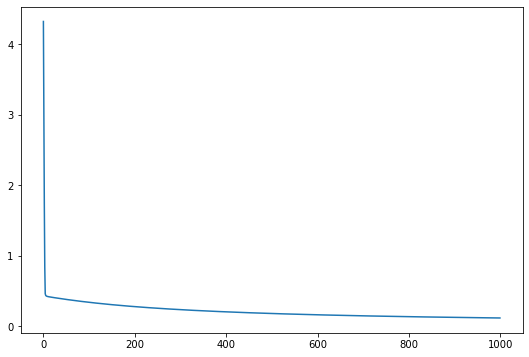

In [10]:
L2 = LogisticRegression(X)
L2.fit(X,y2)

(90000, 2)


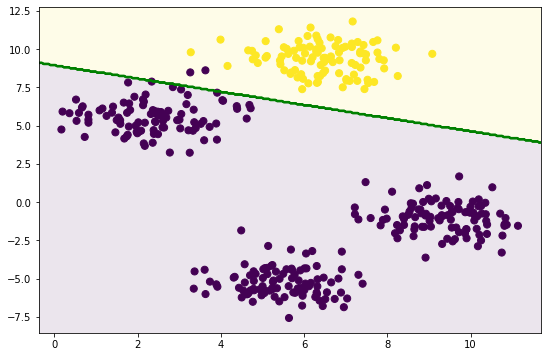

In [11]:
plot_boundary(X,y2,L2)

In [12]:
y3 = np.zeros(y_.shape)
for i in range(len(y_)):
    if y[i] == 2:
        y3[i] = 1
    else :
        y3[i] = 0

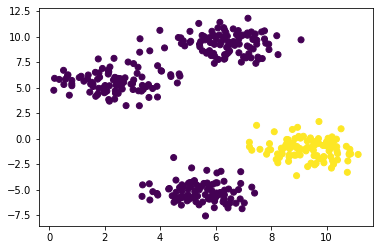

In [13]:
plt.scatter(X[:,0], X[:, 1], c=y3)
plt.show()

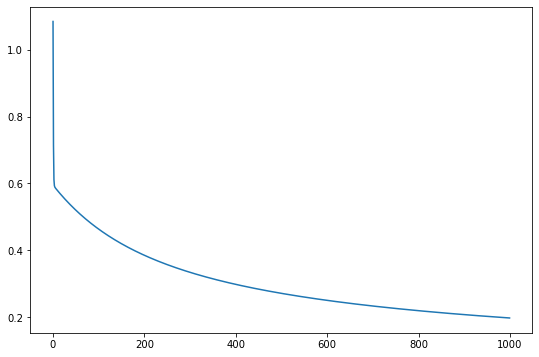

In [14]:
L3 = LogisticRegression(X)
L3.fit(X,y3)

(90000, 2)


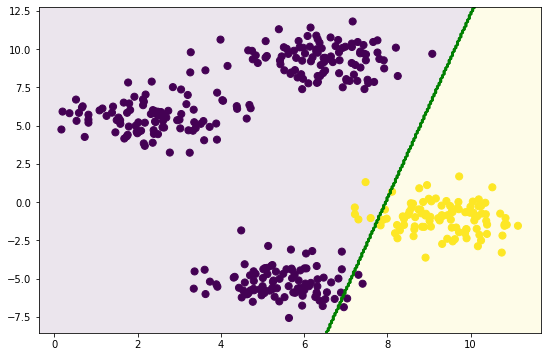

In [15]:
plot_boundary(X,y3,L3)

In [16]:
y4 = np.zeros(y_.shape)
for i in range(len(y_)):
    if y[i] == 3:
        y4[i] = 1
    else :
        y4[i] = 0

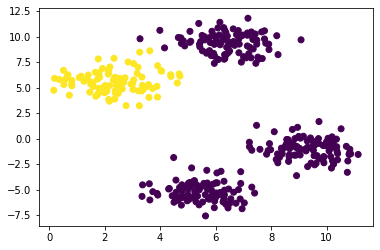

In [17]:
plt.scatter(X[:,0], X[:, 1], c=y4)
plt.show()

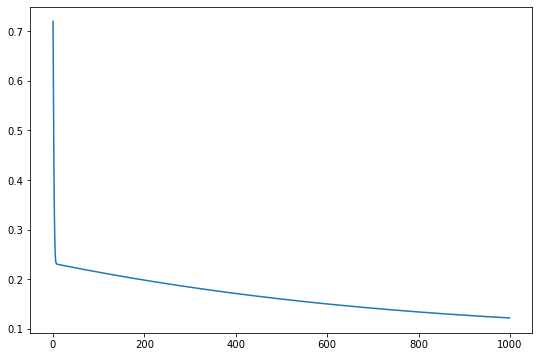

In [18]:
L4 = LogisticRegression(X)
L4.fit(X,y4)

(90000, 2)


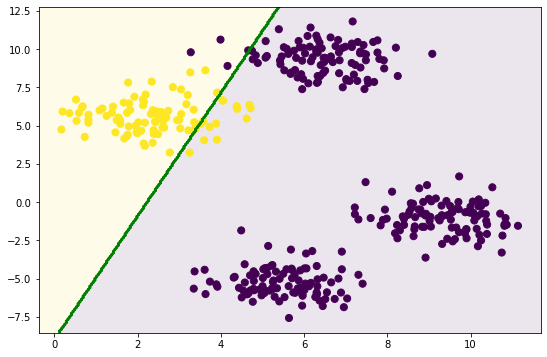

In [19]:
plot_boundary(X,y4,L4)

By analyzing the probability scores, we predict the result as the class index having a maximum probability score.

In [20]:
def multiclass_predict(X):
    y = np.zeros(X.shape[0])
    for x in range(len(X)):
        predictions = [L1.compute_prob(X[x]),L2.compute_prob(X[x]),L3.compute_prob(X[x]),L4.compute_prob(X[x])]
        i = int(np.argmax(np.array(predictions)))
        y[x] = i
    return y

In [21]:
y_predict = multiclass_predict(X)

In [22]:
multiclass_accuracy = ((y == y_predict).sum())/y.shape[0]

In [23]:
print(f"The accuracy of our multiclass logistic regression is {multiclass_accuracy}")

The accuracy of our multiclass logistic regression is 0.985
